# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best) “off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [64]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy

In [65]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from math import isclose

### Subsection 1

In [66]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r',label="1")
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b',label="-1")

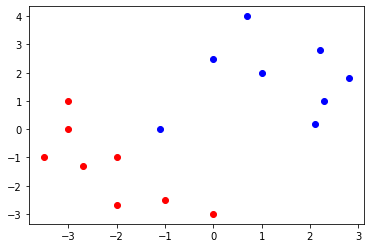

In [67]:
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here.**

**Note: You cannot use sklearn SVM functions here.**

![image info](image.jpeg)
$g(x)=w^Tx+b$, and we want to maximise classification margin.<br>  

Since we can change $w$ and $b$,  
let $\min_{x_i\in D}|w^Tx_i+b|=1$<br>  
  
Margin width $k=\max_{w,b}\frac{1}{\lVert w\rVert^2}\min_{x_i\in D}|w^Tx_i+b|$  
  
$$\therefore k=\max_{w,b}\frac{1}{\lVert w\rVert^2}=\min_{w,b}\lVert w\rVert^2$$  
  
Thus, our objective is to minimise $\lVert w\rVert^2$   
  while maintaining $y_i(w^Tx_i+b)\geq1\text{ }\forall i$

In [68]:
def svm(x,y):
    aug_x = np.ones((x.shape[0],x.shape[1]+1))
    aug_x[:x.shape[0],:x.shape[1]] = x
    thr = 3
    P = np.zeros((thr, thr))
    P[0, 0] = P[1, 1] = 1
    var = cp.Variable(aug_x.shape[1])
    prob = cp.Problem(cp.Minimize(cp.quad_form(var, P)),
                    [(y_*(x_.transpose()@var)) >= 1 for y_, x_ in zip(y, aug_x)])
    prob.solve()
    params  = var.value
    tw = 2
    w = params[:tw]
    b = params[tw]
    return w,b

In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [69]:
def plot_line(x,y,w,b,label="line"):
    slope1 = 1
    m = -w[0]/w[slope1]
    c = -b/w[1]
    ax1 = np.linspace(np.amin(x[:,0]),np.amax(x[:,0]),2)
    plt.plot(ax1,m*ax1+c,label=label)

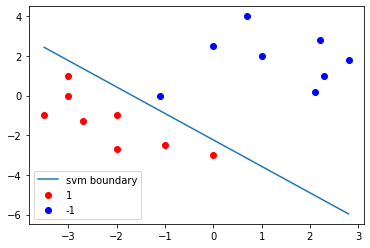

In [70]:
w,b = svm(X,y)
plot_points(X,y)
plot_line(X,y,w,b,label="svm boundary")
plt.legend()
plt.show()

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here.**

In [71]:
def get_support_vectors(x,y,w,b,return_indices=False):
    loca  = 0
    aug_x = np.ones((x.shape[loca],x.shape[1]+1))
    aug_x[:x.shape[0],:x.shape[1]] = x
    vec = np.array(w.tolist()+[b],dtype=w.dtype)
    ind = []
    for i in range(x.shape[loca]):
        if isclose(aug_x[i].transpose().T @ vec,1) or isclose(aug_x[i].transpose().T @ vec,-1):
            ind.append(i)
    if return_indices:
        return ind
    return x[ind],y[ind]

In [72]:
def plot_margins(X,y,w,b):
    plot_line(X,y,w,b+1,label="upper margin")
    plot_line(X,y,w,b-1,label="lower margin")

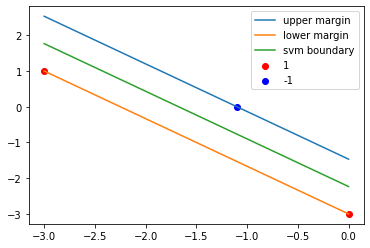

In [73]:
pts, labels = get_support_vectors(X,y,w,b)
plot_points(pts,labels)
plot_margins(pts,labels,w,b)
plot_line(pts,labels,w,b,label="svm boundary")
plt.legend()
plt.show()

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

In [74]:
X_new = np.array(X.tolist()+[[-4,-10],[4,4]])
y_new = np.array(y.tolist()+[1,-1])

[-1.73913043 -1.30434783] [-1.73913043 -1.30434783]
-2.9130434782608696 -2.913043478260871


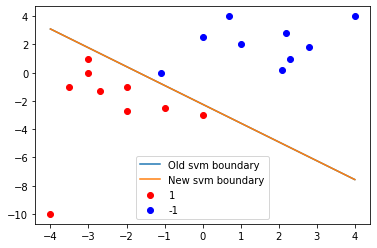

In [75]:
w_new,b_new = svm(X_new,y_new)
print(w,w_new)
print(b,b_new)
plot_points(X_new,y_new)
plot_line(X_new,y_new,w,b,label="Old svm boundary")
plot_line(X_new,y_new,w_new,b_new,label="New svm boundary")
plt.legend()
plt.show()

Hence, the Decision Boundary is the same.<br>
This is because the newly added points are far away from the boundary

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell.**

In [76]:
def svm_slack(x,y,c):
    aug_x = np.ones((x.shape[0],x.shape[1]+1))
    aug_x[:x.shape[0],:x.shape[1]] = x
    P = np.zeros((3, 3))
    P[0, 0] = P[1, 1] = 1
    var = cp.Variable(aug_x.shape[1])
    t = cp.Variable(aug_x.shape[0])
    prob = cp.Problem(
        cp.Minimize(
            cp.quad_form(var, P)*0.5+c*cp.sum(t)
        ),
        [(y_*(x_.transpose()@var)) >= 1-t[i] for y_, x_, i in zip(y, aug_x, range(aug_x.shape[0]))]+[t[i]>=0 for i in range(aug_x.shape[0])]
    )
    prob.solve()
    params  = var.value
    w = params[:2]
    b = params[2]
    return w,b

In [77]:
# Write your code here for C= 0.01
w_001,b001 = svm_slack(X_new,y_new,0.01)
print(w_001,b001)

[-0.22506809 -0.19858949] 0.013672178988326457


In [78]:
# Write your code here for C= 0.1
w_01,b01 = svm_slack(X_new,y_new,0.1)
print(w_01,b01)

[-0.38493724 -0.35146444] -0.12133891213389113


In [79]:
# Write your code here for C= 3
w_3,b3 = svm_slack(X_new,y_new,3)
print(w_3,b3)

[-1.73913043 -1.30434783] -2.9130434782608705


In [80]:
# Write your code here for C= 10
w_10,b10 = svm_slack(X_new,y_new,10)
print(w_10,b10)

[-1.73913043 -1.30434783] -2.9130434782608705


In [81]:
# Write your code here for C= 100
w_100,b100 = svm_slack(X_new,y_new,100)
print(w_100,b100)

[-1.73913043 -1.30434783] -2.913043478260871


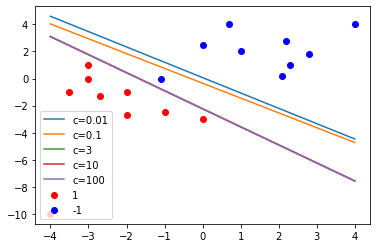

In [82]:
plot_points(X_new,y_new)
plot_line(X_new,y_new,w_001,b001,label="c=0.01")
plot_line(X_new,y_new,w_01,b01,label="c=0.1")
plot_line(X_new,y_new,w_3,b3,label="c=3")
plot_line(X_new,y_new,w_10,b10,label="c=10")
plot_line(X_new,y_new,w_100,b100,label="c=100")
plt.legend()
plt.show()

Value of C is inversely proportional to allowance of error.<br>
Hence, for lower values of C, we see some misclassified points which are correctly classified upon increasing value of C.


Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

[-0.38493724 -0.35146444] -0.12133891213389121


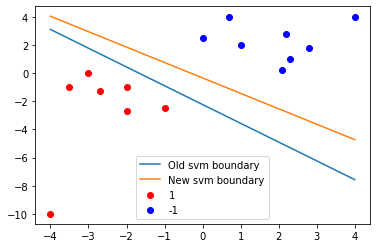

In [83]:
ind = get_support_vectors(X_new,y_new,w_100,b100,return_indices=True)
rem_ind = list(range(X_new.shape[0]))
for i in ind:
    rem_ind.remove(i)
X_red = X_new[rem_ind]
y_red = y_new[rem_ind]
w_red,b_red = svm_slack(X_red,y_red,100)
print(w_red,b_red)
plot_points(X_red,y_red)
plot_line(X_new,y_new,w_new,b_new,label="Old svm boundary")
plot_line(X_red,y_red,w_red,b_red,label="New svm boundary")
plt.legend()
plt.show()

The decision boundary changes.<br>
This is because main goal of SVM is to mfind a decision boundary that maximises margin.<br>
And when you take out the support vectors, the potential margin changes and given the data, a new decision boundary might suffice the condition for SVM.

### Subsection 2

In [84]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

--2021-12-03 14:52:28--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2021-12-03 14:52:28 (81.3 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-12-03 14:52:28--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘samples/train-labels-idx1-ubyte.gz’

train-labels

In [85]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [91]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l,d = len(labels), len(images[0])
images_train = np.array(images)[:l//10]
# [:l//100,:d//10]
labels_train = np.array(labels)[:l//10]
# [:l//100]

print(images_train.shape)
print(labels_train.shape)

(6000, 784)
(6000,)


In [92]:
# Load testing dataset
images, labels = mndata.load_testing()
l,d = len(labels), len(images[0])
images_test = np.array(images)[:l//10]
# [:l//100,:d//10]
labels_test = np.array(labels)[:l//10]
# [:l//100]

print(images_test.shape)
print(labels_test.shape)

(1000, 784)
(1000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [93]:
X_train, X_test, y_train, y_test = images_train, images_test, labels_train, labels_test

CPU times: user 49.8 s, sys: 46.7 ms, total: 49.8 s
Wall time: 49.6 s


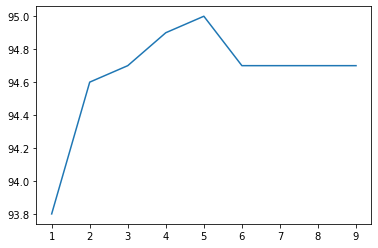

In [94]:
%%time
from sklearn.metrics import accuracy_score
ax = list(range(1, 10))
val = []
for c in ax:
    SVM = SVC(C=c, kernel = 'rbf')
    SVM.fit(X_train, y_train)
    val.append(accuracy_score(y_test, SVM.predict(X_test))*100)
plt.plot(ax, val)

In [95]:
for kernel in ("linear", "poly", "rbf"):
    SVM = SVC(C=10, kernel = kernel)
    SVM.fit(X_train, y_train)
    print(f"Accuracy is {100*accuracy_score(y_test, SVM.predict(X_test))}%")
    print(f"Kernel is {kernel}")

Accuracy is 88.8%
Kernel is linear
Accuracy is 92.5%
Kernel is poly
Accuracy is 94.69999999999999%
Kernel is rbf
